# Analysis of the relation between AC thresholds and the BC direct thresholds

14-03-2021 Guido Cattani

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from scipy.stats import linregress as linregress

In [2]:
# read measured thresholds
def read_AC_thresholds():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/AC_thresholds.xlsx'
    p_in = Path(f_in)   
    df = pd.read_excel(p_in, engine='openpyxl', sheet_name=0, header=0, nrows=85)
    df = df.drop(['Unnamed: 0'], axis=1)
    type_dict = {'Study_ID': 'str', 'Device': 'str',
             'AC_125':'float32', 'AC_250':'float32', 'AC_500':'float32', 
             'AC_1000': 'float32', 'AC_2000': 'float32', 
             'AC_4000': 'float32', 'AC_8000': 'float32'}
    df = df.astype(type_dict)
    df = df.drop(columns='Study_ID')
    df = df.fillna(pd.NA)
    return df

In [3]:
# read measured BC direct thresholds
def read_BC_direct_thresholds():
    f_in = '/media/guido/LACIE/Cingle_Guido/Master/BC_direct_thresholds.xlsx'
    p_in = Path(f_in)   
    df = pd.read_excel(p_in, engine='openpyxl', sheet_name=0, header=0, nrows=85)
    df = df.drop(['Unnamed: 0'], axis=1)
    df = df.drop(columns='Study_ID')
    df = df.fillna(pd.NA)
    return df

In [4]:
def select_bp110(df):
    # select BP110 data
    is_bp110 =  df['Device']=='BP110'
    df_bp110 = df[is_bp110]
    df_bp110.pop('Device')
    return(df_bp110)

In [5]:
def select_bh5(df):
    # select BAHA5P data
    is_baha5p =  df['Device']=='BAHA5P'
    df_baha5p = df[is_baha5p]
    df_baha5p.pop('Device')
    return(df_baha5p)

In [6]:
bct = read_BC_direct_thresholds()
act = read_AC_thresholds()
bct1 = bct[['Device', 'BCd_1000', 'BCd_2000', 'BCd_4000']].copy()
act1 = act[['AC_1000', 'AC_2000', 'AC_4000']].copy()
combi = pd.concat([bct1, act1], axis=1)
combi = combi.dropna()
combi.head()

,Device,BCd_1000,BCd_2000,BCd_4000,AC_1000,AC_2000,AC_4000
0,BP110,35,45,35.0,10.0,10.0,0.0
1,BP110,30,30,70.0,10.0,15.0,65.0
2,BP110,20,25,70.0,15.0,10.0,30.0
3,BP110,20,30,40.0,5.0,20.0,45.0
4,BP110,10,20,25.0,5.0,5.0,15.0


In [7]:
combi_bh5 = select_bh5(combi)
combi_bp110 = select_bp110(combi)
combi_bh5.head()

,BCd_1000,BCd_2000,BCd_4000,AC_1000,AC_2000,AC_4000
20,20,30,35.0,10.0,15.0,25.0
37,45,15,35.0,20.0,5.0,15.0
47,20,30,25.0,5.0,5.0,0.0
51,15,30,30.0,20.0,5.0,20.0
53,20,35,50.0,10.0,15.0,35.0


In [8]:
for i in range(1, 4):
    bcdt = (combi.iloc[:,i]).to_numpy(dtype='float')
    actn = (combi.iloc[:,i+3]).to_numpy(dtype='float')
    lrgrs = linregress(bcdt, actn)
    print(2**(i-1),'kHz', lrgrs)

1 kHz LinregressResult(slope=0.3672055427251733, intercept=1.52809853733641, rvalue=0.42207057278270343, pvalue=6.363246802493531e-05, stderr=0.08709940878890002, intercept_stderr=2.324432385796082)
2 kHz LinregressResult(slope=0.3386697005404088, intercept=1.457681524521556, rvalue=0.40320749032149295, pvalue=0.0001430363606710234, stderr=0.08488158004131933, intercept_stderr=2.8071943959944328)
4 kHz LinregressResult(slope=0.9168499675327985, intercept=-12.684264116433155, rvalue=0.7161581967233527, pvalue=1.891902212790609e-14, stderr=0.09867320140213447, intercept_stderr=4.324500838933291)


In [9]:
for i in range(3):
    bcdt_bp110 = (combi_bp110.iloc[:,i]).to_numpy(dtype='float')
    act_bp110 = (combi_bp110.iloc[:,i+3]).to_numpy(dtype='float')
    lrgrs = linregress(bcdt_bp110, act_bp110)
    print(2**i,'kHz', lrgrs)

1 kHz LinregressResult(slope=0.34722377388001346, intercept=2.388559937437156, rvalue=0.4383607708945204, pvalue=0.0018308925554815748, stderr=0.1049691033252161, intercept_stderr=2.8717012490255254)
2 kHz LinregressResult(slope=0.35393893705239354, intercept=1.4072119613016714, rvalue=0.4068657786776527, pvalue=0.004106744746386181, stderr=0.11716586068041755, intercept_stderr=3.9957180390752276)
4 kHz LinregressResult(slope=0.9184205948860672, intercept=-12.134574128834007, rvalue=0.7175349415719587, pvalue=9.532709853472877e-09, stderr=0.13144824742531314, intercept_stderr=6.0646606474989335)


In [10]:
for i in range(3):
    bcdt_bh5 = (combi_bh5.iloc[:,i]).to_numpy(dtype='float')
    act_bh5 = (combi_bh5.iloc[:,i+3]).to_numpy(dtype='float')
    lrgrs = linregress(bcdt_bh5, act_bh5)
    print(2**i,'kHz', lrgrs)

1 kHz LinregressResult(slope=0.40922401171303074, intercept=0.021961932650073734, rvalue=0.3961705391463837, pvalue=0.016760168052862005, stderr=0.16265441557632845, intercept_stderr=4.190960403935539)
2 kHz LinregressResult(slope=0.29990884229717424, intercept=2.0305378304466686, rvalue=0.37437449559036123, pvalue=0.02448188141133168, stderr=0.1273952758157975, intercept_stderr=4.031389010080773)
4 kHz LinregressResult(slope=0.8800371114890984, intercept=-12.074779650533472, rvalue=0.6822543002398703, pvalue=4.588105388425802e-06, stderr=0.16173384487478407, intercept_stderr=6.556873053188244)


In [11]:
bcdt_1k_bh5 = combi_bh5.iloc[:,0].to_numpy(dtype='float')
act_1k_bh5 = (combi_bh5.iloc[:,3]).to_numpy(dtype='float')
lrgrs_1k_bh5 = linregress(bcdt_1k_bh5, act_1k_bh5)
r2_1k_bh5 = (lrgrs_1k_bh5[2])**2
r2_1k_bh5 = round(r2_1k_bh5, 2)
s_1k = 'r square 1 kHz =' + str(r2_1k_bh5)
print(s_1k)

r square 1 kHz =0.16


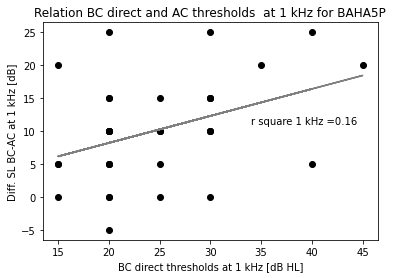

In [12]:
plt.scatter(bcdt_1k_bh5, act_1k_bh5, c='black')
plt.title("Relation BC direct and AC thresholds at 1 kHz for BAHA5P")
plt.xlabel("BC direct thresholds at 1 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 1 kHz [dB]")
slope = lrgrs_1k_bh5[0]
intercept = lrgrs_1k_bh5[1]
plt.plot(bcdt_1k_bh5, slope*bcdt_1k_bh5 + intercept, color='grey')
plt.text(34, 11, s_1k)
plt.show()

In [13]:
bcdt_2k_bh5 = combi_bh5.iloc[:,1].to_numpy(dtype='float')
act_2k_bh5 = (combi_bh5.iloc[:,4]).to_numpy(dtype='float')
lrgrs_2k_bh5 = linregress(bcdt_2k_bh5, act_2k_bh5)
r2_2k_bh5= (lrgrs_2k_bh5[2])**2
r2_2k_bh5 = round(r2_2k_bh5, 2)
s_2k = 'r square 2 kHz =' + str(r2_2k_bh5)
print(s_2k)

r square 2 kHz =0.14


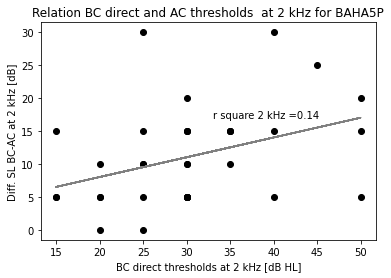

In [14]:
plt.scatter(bcdt_2k_bh5, act_2k_bh5, c='black')
plt.title("Relation BC direct and AC thresholds at 2 kHz for BAHA5P")
plt.xlabel("BC direct thresholds at 2 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 2 kHz [dB]")
slope = lrgrs_2k_bh5[0]
intercept = lrgrs_2k_bh5[1]
plt.plot(bcdt_2k_bh5, slope*bcdt_2k_bh5 + intercept, color='grey')
plt.text(33, 17, s_2k)
plt.show()

In [15]:
bcdt_4k_bh5 = combi_bh5.iloc[:,2].to_numpy(dtype='float')
act_4k_bh5 = (combi_bh5.iloc[:,5]).to_numpy(dtype='float')
lrgrs_4k_bh5 = linregress(bcdt_4k_bh5, act_4k_bh5)
r2_4k_bh5= (lrgrs_4k_bh5[2])**2
r2_4k_bh5 = round(r2_4k_bh5, 2)
s_4k = 'r square 4 kHz =' + str(r2_4k_bh5)
print(s_4k)

r square 4 kHz =0.47


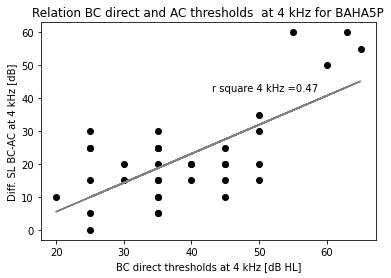

In [16]:
plt.scatter(bcdt_4k_bh5, act_4k_bh5, c='black')
plt.title("Relation BC direct and AC thresholds at 4 kHz for BAHA5P")
plt.xlabel("BC direct thresholds at 4 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 4 kHz [dB]")
slope = lrgrs_4k_bh5[0]
intercept = lrgrs_4k_bh5[1]
plt.plot(bcdt_4k_bh5, slope*bcdt_4k_bh5 + intercept, color='grey')
plt.text(43, 42, s_4k)
plt.show()

In [17]:
bcdt_4k_bp110 = combi_bp110.iloc[:,2].to_numpy(dtype='float')
act_4k_bp110 = (combi_bp110.iloc[:,5]).to_numpy(dtype='float')
lrgrs_4k_bp110 = linregress(bcdt_4k_bp110, act_4k_bp110)
r2_4k_bp110= (lrgrs_4k_bp110[2])**2
r2_4k_bp110 = round(r2_4k_bp110, 2)
s_4k = 'r square 4 kHz =' + str(r2_4k_bp110)
print(s_4k)

r square 4 kHz =0.51


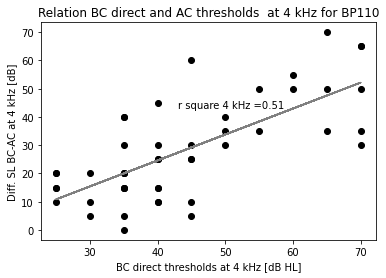

In [18]:
plt.scatter(bcdt_4k_bp110, act_4k_bp110, c='black')
plt.title("Relation BC direct and AC thresholds at 4 kHz for BP110")
plt.xlabel("BC direct thresholds at 4 kHz [dB HL]")
plt.ylabel("Diff. SL BC-AC at 4 kHz [dB]")
slope = lrgrs_4k_bp110[0]
intercept = lrgrs_4k_bp110[1]
plt.plot(bcdt_4k_bp110, slope*bcdt_4k_bp110 + intercept, color='grey')
plt.text(43, 43, s_4k)
plt.show()